# Systematic impacts of word onsets on word concreteness

### Sean Trott, Arturs Semenuks, Benjamin Bergen

Do the sounds in a word impact its meaning? 

In [another notebook](https://github.com/seantrott/concreteness/blob/master/phonetic_onset_concreteness.ipynb), I showed that the first phoneme in a word *can* have predictable effects on its concreteness. 

Here, I repeat this analysis, but with the larger set of [Brysbaert norms](http://crr.ugent.be/archives/1330).

## Load and Merge Data

In [1]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sn

# Operations
import numpy as np
import pandas as pd 
import statsmodels.formula.api as sm
from tqdm import tqdm
import scipy.stats as ss

# Custom imports
from nlp_utilities.compling import CorpusUtilities
from src.utils import get_concreteness_for_word


In [2]:
# Set global variables
DATA_PATH = "data/raw/brysbaert_norms.csv"
CHARACTER_INDEX	= 0
# Get data
df = pd.read_csv(DATA_PATH)
df['Word'] = df['Word'].str.lower()
df['Concreteness'] = df['Conc.M']
print("Number of words left in dataset: {num}".format(num=len(df)))

# Drop duplicates
df = df.drop_duplicates(subset="Word")
print("Number of words left in dataset: {num}".format(num=len(df)))

# Load celex
df_celex = pd.read_csv("data/raw/celex_all.csv", sep = "\\")
df_celex = df_celex.drop_duplicates(subset='Word')
print("Number of words in CELEX: {num}".format(num=len(df_celex)))

# Merge together to get phonetic representations
df_merged = df_celex.merge(df, on="Word")
print("Number of words in both Brysbaert and CELEX: {num}".format(num=len(df_merged)))

Number of words left in dataset: 39954
Number of words left in dataset: 39954
Number of words in CELEX: 46133
Number of words in both Brysbaert and CELEX: 24379


In [3]:
# Drop duplicate phonetic representations (homophones)
df_merged = df_merged.drop_duplicates(subset = 'PhonDISC')
print("Number of words left: {num}".format(num=len(df_merged)))

Number of words left: 24059


In [4]:
df_merged.head(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos,Concreteness
0,a,4.36,1,1,ART,1,0,1.46,1.14,2,30,0.93,1041179,Article,1.46
1,aback,0.48,2,@b{k,ADV,2,0,1.65,1.07,4,27,0.85,15,Adverb,1.65
2,abacus,0.00,0,{b@k@s,N,3,0,4.52,1.12,2,29,0.93,12,Noun,4.52
3,abandon,0.30,1,@b{nd@n,N,3,0,2.54,1.45,1,27,0.96,413,Verb,2.54
4,abandoned,0.00,1,@b{nd@nd,A,3,0,2.52,1.27,0,29,1.00,678,Verb,2.52


## Analysis 1: Concreteness ~ Onset phone

In [5]:
df_merged = df_merged[df_merged['CompCnt']<=1]
print("Number of words left: {num}".format(num=len(df_merged)))

In [6]:
df_merged['onset'] = df_merged['PhonDISC'].apply(lambda x: x[0])
df_merged['word_length'] = len(df_merged['PhonDISC'])

In [34]:
result = sm.ols(formula="Concreteness ~ onset + word_length + Class + CobLog", data=df_merged).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     72.98
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:11:16   Log-Likelihood:                -12376.
No. Observations:                9658   AIC:                         2.486e+04
Df Residuals:                    9606   BIC:                         2.523e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.846e-08   1.49e-09     19.151      0.000    2.55e-08    3.14e-08
onset[T.$]       -0.2490      0.173     -1.440      0.150      -0.588       0.090
onset[T.1]        0.0524      0.204      0.257      0.797      -0.347       0.451
onset[T.2]        0.0263      0.214      0.123      0.902      -0.394       0.446
onset[T.3]       -0.4594      0.297     -1.548      0.122      -1.041       0.123
onset[T.4]        0.8633      0.414      2.085      0.037       0.052       1.675
onset[T.5]       -0.2168      0.177     -1.228      0.219      -0.563       0.129
onset[T.6]       -0.5353      0.217     -2.471      0.013      -0.960      -0.111
onset[T.7]       -0.4912      0.523     -0.940      0.347      -1.516       0.534
onset[T.8]       -0.2192      0.414     -0.530      0.596      -1.031       0.592
onset[T.@]       -0.5317      0.147     -3.613      0.000      -0.820      -0.243
onset[T.D]       -0.5587      0.272     -2.057      0.040      -1.091      -0.026
onset[T.E]       -0.3872      0.157     -2.470      0.014      -0.695      -0.080
onset[T.I]       -0.5866      0.143     -4.107      0.000      -0.867      -0.307
onset[T.J]        0.2846      0.164      1.737      0.082      -0.037       0.606
onset[T.Q]       -0.2201      0.173     -1.275      0.202      -0.558       0.118
onset[T.S]        0.2222      0.155      1.429      0.153      -0.083       0.527
onset[T.T]       -0.1930      0.171     -1.131      0.258      -0.528       0.141
onset[T.U]       -1.4165      0.637     -2.225      0.026      -2.665      -0.168
onset[T.V]       -0.3431      0.175     -1.965      0.049      -0.685      -0.001
onset[T.Z]       -1.0536      0.633     -1.665      0.096      -2.294       0.187
onset[T._]        0.0320      0.155      0.207      0.836      -0.271       0.335
onset[T.b]        0.1284      0.141      0.909      0.364      -0.149       0.405
onset[T.d]       -0.3170      0.141     -2.241      0.025      -0.594      -0.040
onset[T.f]       -0.2104      0.142     -1.477      0.140      -0.490       0.069
onset[T.g]        0.0338      0.145      0.233      0.816      -0.251       0.319
onset[T.h]       -0.0833      0.144     -0.577      0.564      -0.367       0.200
onset[T.i]       -0.4029      0.231     -1.743      0.081      -0.856       0.050
onset[T.j]       -0.1576      0.174     -0.906      0.365      -0.498       0.183
onset[T.k]       -0.0346      0.139     -0.248      0.804      -0.308       0.239
onset[T.l]       -0.0205      0.145     -0.141      0.888      -0.305       0.264
onset[T.m]       -0.1019      0.142     -0.718      0.473      -0.380       0.176
onset[T.n]       -0.2272      0.150     -1.512      0.130      -0.522       0.067
onset[T.p]       -0.1278      0.140     -0.912      0.362      -0.402       0.147
onset[T.q]        0.0355      0.635      0.056   

In [8]:
result.rsquared

0.27927111032901053

In [9]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 50

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_merged.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="Concreteness ~ shuffled_onset + word_length + Class + CobLog", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 50/50 [00:06<00:00,  7.49it/s]


In [10]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.2501408096350839
0.0006759905422061107


Text(0.5, 1.0, 'Real R^2 vs. distribution from random permutations')

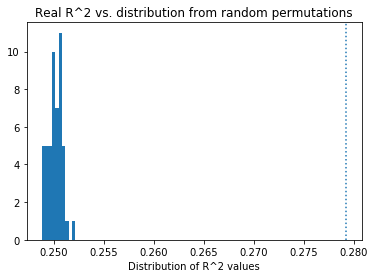

In [11]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Real R^2 vs. distribution from random permutations")

### Discussion and exploration

Based on these results, it seems like:

First, there is more structure in mappings between phonetic onsets and word concreteness than one would expect by chance, even controlling for grammatical class, word length, and word frequency.

Certain onsets exhibit particularly strong effects, such as: 
- **/@/** (the onset in *abandon* or *abide*) has a consistently *negative* impact on concreteness.
- **/I/** (the onset in *elastic*) has a consistently *negative* impact on concreteness.
- **/D/** (the onset in *they*) has a *negative* impact on concreteness.
- **/z/** (the onset in *zeal* or *zero*) has a marginally *negative* impact on concreteness.

## Analysis 2: Concreteness impact ~ onset

In [12]:
# Get minimal sets
print("Getting minimal sets...")
minimal_sets = CorpusUtilities.get_minimal_orthographic_sets(df_merged['PhonDISC'], index=CHARACTER_INDEX)
print("Number of minimal sets: {num}".format(num=len(minimal_sets)))

  0%|          | 4/9659 [00:00<04:26, 36.29it/s]

Getting minimal sets...


100%|██████████| 9659/9659 [21:48<00:00,  7.38it/s]  

Number of minimal sets: 962


In [15]:
lengths = np.array([len(s) for s in minimal_sets])
mean_length = np.mean(lengths)
print("Mean set length: {m}".format(m=mean_length))
print("SD set length: {m}".format(m=np.std(lengths)))
print("Min set length: {m}".format(m=min(lengths)))
print("Max set length: {m}".format(m=max(lengths)))
print("Total words: {m}".format(m=sum(lengths)))

Mean set length: 3.3887733887733886
SD set length: 2.4050792477032
Min set length: 2
Max set length: 17
Total words: 3260


2.389647230192411


(array([701.,  74.,  91.,  26.,  33.,   8.,  18.,   5.,   4.,   2.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <a list of 10 Patch objects>)

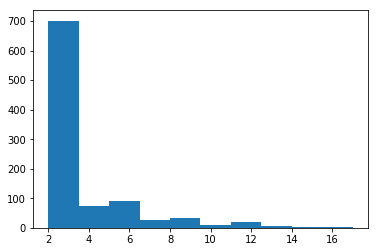

In [16]:
print(ss.skew(lengths))
plt.hist(lengths)

In [17]:
# Calculate onset impact
onset_to_impact = []
for set_index, ms in tqdm(list(enumerate(minimal_sets))):
    letters = [w[CHARACTER_INDEX] for w in ms]
    by_word_cnc = get_concreteness_for_word(ms, df_merged, column='PhonDISC')
    mean_cnc = np.mean(by_word_cnc)
    set_size = len(ms)
    for index, onset in enumerate(letters):
        to_add = [onset, by_word_cnc[index] - mean_cnc, mean_cnc, ms[index], set_index, set_size, len(ms[index])]
        onset_to_impact.append(to_add)

COLUMNS = ['onset', 'concreteness_impact', 'set_mean', 'original_word', 'set_index', 'set_size', 'word_length']
final_df = pd.DataFrame(onset_to_impact, columns=COLUMNS)


100%|██████████| 962/962 [00:07<00:00, 137.00it/s]


In [20]:
final_df.to_csv("data/processed/brysbaert_concreteness_impacts.csv")

### Characterization

In [77]:
df_final = pd.read_csv("data/processed/brysbaert_concreteness_impacts.csv")

Text(0, 0.5, 'Count')

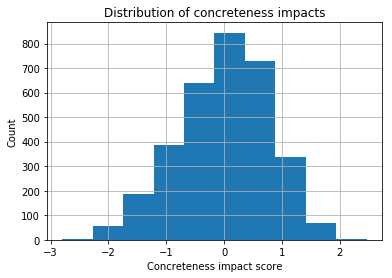

In [78]:
df_final.hist(column='concreteness_impact')
plt.title("Distribution of concreteness impacts")
plt.xlabel("Concreteness impact score")
plt.ylabel("Count")

In [79]:
print("Skew: {s}".format(s=ss.stats.skew(df_final['concreteness_impact'])))
print("Mean: {m}".format(m=np.mean(df_final['concreteness_impact'])))
print("SD: {sd}".format(sd=np.std(df_final['concreteness_impact'])))

Skew: -0.2973130249611024
Mean: 3.1876342056722287e-17
SD: 0.7886488449959396


### Characterization

In [80]:
result = sm.ols(formula="concreteness_impact ~ onset + set_mean + set_size + word_length", data=df_final).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concreteness_impact   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     3.444
Date:                 Thu, 25 Apr 2019   Prob (F-statistic):           7.76e-13
Time:                         10:23:50   Log-Likelihood:                -3780.0
No. Observations:                 3260   AIC:                             7646.
Df Residuals:                     3217   BIC:                             7908.
Df Model:                           42                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2973      0.294      1.010      0.313      -0.280       0.874
onset[T.$]     -0.2779      0.336     -0.826      0.409      -0.938       0.382
onset[T.1]     -0.1991      0.354     -0.562      0.574      -0.894       0.496
onset[T.2]      0.2501      0.369      0.679      0.497      -0.473       0.973
onset[T.3]     -0.6107      0.388     -1.572      0.116      -1.372       0.151
onset[T.4]      0.1436      0.526      0.273      0.785      -0.887       1.175
onset[T.5]     -0.0780      0.325     -0.240      0.810      -0.715       0.559
onset[T.6]     -0.2524      0.476     -0.531      0.596      -1.185       0.680
onset[T.7]      0.2257      0.614      0.368      0.713      -0.978       1.430
onset[T.8]     -0.0906      0.614     -0.148      0.883      -1.295       1.113
onset[T.@]     -0.8110      0.316     -2.563      0.010      -1.431      -0.191
onset[T.D]     -1.6326      0.337     -4.842      0.000      -2.294      -0.971
onset[T.E]     -0.2092      0.361     -0.579      0.563      -0.918       0.499
onset[T.I]     -0.5775      0.322     -1.795      0.073      -1.208       0.053
onset[T.J]     -0.0559      0.292     -0.191      0.848      -0.629       0.517
onset[T.Q]     -0.0919      0.369     -0.249      0.803      -0.815       0.631
onset[T.S]      0.0008      0.287      0.003      0.998      -0.562       0.564
onset[T.T]     -0.3034      0.301     -1.009      0.313      -0.893       0.286
onset[T.V]     -0.0962      0.378     -0.254      0.799      -0.837       0.645
onset[T._]     -0.1213      0.291     -0.416      0.677      -0.692       0.450
onset[T.b]     -0.0348      0.280     -0.124      0.901      -0.583       0.514
onset[T.d]     -0.2060      0.282     -0.731      0.465      -0.759       0.347
onset[T.f]     -0.2433      0.281     -0.865      0.387      -0.794       0.308
onset[T.g]     -0.1276      0.283     -0.451      0.652      -0.682       0.427
onset[T.h]     -0.2108      0.282     -0.746      0.455      -0.765       0.343
onset[T.i]     -0.3373      0.355     -0.951      0.342      -1.032       0.358
onset[T.j]     -0.3356      0.307     -1.092      0.275      -0.938       0.267
onset[T.k]      0.0015      0.280      0.005      0.996      -0.548       0.551
onset[T.l]     -0.2123      0.283     -0.751      0.453      -0.766       0.342
onset[T.m]     -0.1974      0.282     -0.700      0.484      -0.750       0.355
onset[T.n]     -0.3320      0.288     -1.155      0.248      -0.896       0.232
onset[T.p]     -0.0655      0.280     -0.233      0.815      -0.615       0.484
onset[T.r]     -0.1661      0.282     -0.590      0.555      -0.718       0.386
onset[T.s]     -0.0926      0.281     -0.330      0.741      -0.643       0.458
onset[T.t]     -0.0644      0.282     -0.229      0.819      -0.617       0.488
onset[T.u]      0.6871      0.82

In [81]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 100

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_final.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="concreteness_impact ~ shuffled_onset + set_mean + set_size + word_length", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 100/100 [00:03<00:00, 26.57it/s]


In [82]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.011805944228417636
0.002719922738907331


Text(0.5, 1.0, 'Concreteness impact: Real R^2 vs. random shuffles')

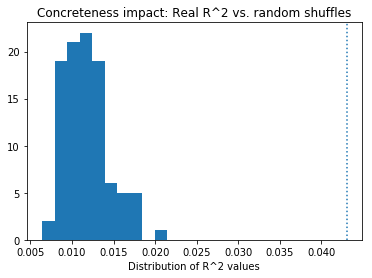

In [83]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Concreteness impact: Real R^2 vs. random shuffles")

## Discussion and exploration

Based on these results, it seems like:

First, there is more structure in mappings between phonetic onsets and word concreteness than one would expect by chance, one we control for characteristics about the rest of the word.

Certain onsets exhibit particularly strong effects, such as: 
- **/D/** (the onset in *they*) has a consistently *negative* impact on concreteness.
- **/@/** (the onset in *abandon* or *abide*) has a consistently *negative* impact on concreteness.
- **/z/** (the onset in *zeal* or *zero*) has a marginally *negative* impact on concreteness.

Other onsets show trends, but not strongly significant trends.